CMSD Skill Check 
1. accessed all required files, renaming them to match description in the attached instructions
2. Evaluated the formatting of each table type to establish primary keys for joins
3. save first sheet of each file as a csv for easy use as a df
4. create function to iterate of the files to filter unnecasary data and join them accordingly 
5. create subset of data for visualization 



In [1]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parts of the file names for itteration 
years = ['2015_2016', '2016_2017', '2017_2018']
years_ach = ['2015-16', '2016-17', '2017-18']
path = 'C:\\Users\\willd\\OneDrive\\Desktop\\DataAnalysis\\python data\\CMSD test\\csvs\\'
# names = ['building_achievement_', 'building_rating_', 'value_added_' ]
# columns being used from each data frame 
rat_cols = ['Building IRN', 'Building Name', 'Address', 'City, State, Zip', 'Enrollment']
ach_cols = ['Building IRN', 'Performance Index Percent']
val_cols = ['Building IRN', 'Overall Value Added Grade']

In [3]:
# Filter functio to remove other schools and colums that are not required
def filter_df(df_df, df_cols):
    df_df = df_df[df_df["District IRN"] == 43786]
    df_df = df_df[df_cols]
    return df_df

In [4]:
list_of_df = []
for i in range(len(years)):
    year = years[i]
    #new year 
    new_year = year.replace('_','-')
    
    # rating table 
    rat_df = pd.read_csv(f'{path}building_rating_{year}.csv')
    rat_df = rat_df.rename(columns={f'Enrollment {new_year}': 'Enrollment'})
    rat_df = filter_df(rat_df, rat_cols)
    rat_df['School Year'] = new_year
    rat_df['Year Rank'] = (i+1)
    rat_df['full_address'] = rat_df['Address'] + ', ' + rat_df['City, State, Zip']
    
    # achievement table 
    ach_df = pd.read_csv(f'{path}building_achievement_{year}.csv')
    ach_df = ach_df.rename(columns={f'Performance Index Percent {years_ach[i]}': 'Performance Index Percent'})
    ach_df = filter_df(ach_df, ach_cols)
    
    #value added table
    val_df = pd.read_csv(f'{path}value_added_{year}.csv')
    val_df = filter_df(val_df, val_cols)
    
    #joining the tables
    joined_df = rat_df.join(ach_df.set_index('Building IRN'), on='Building IRN')
    joined_df = joined_df.join(val_df.set_index('Building IRN'), on='Building IRN')
    list_of_df.append(joined_df)
    
# concatinate all 3 data froms
all_years_df = pd.concat(list_of_df)

In [133]:
# single dataset saved as a csv 
# all_years_df.to_csv('file_name.csv', index=False)

In [5]:
all_years_df.shape

(356, 10)

In [7]:
all_years_df.drop_duplicates().shape

(356, 10)

## Further Breakedown for Analysis 


### cleaning and prep for metrics 

In [134]:
letters = ['A', 'B', 'C', 'D', 'F']
#removing nans
#removing non letter grades 
all_years_df['Performance Index Percent'] = pd.to_numeric(all_years_df['Performance Index Percent'], errors='coerce')
all_years_df = all_years_df[(all_years_df["Overall Value Added Grade"].isin(letters))]

In [135]:
all_years_df

,Building IRN,Building Name,Address,"City, State, Zip",Enrollment,School Year,Year Rank,full_address,Performance Index Percent,Overall Value Added Grade
447,224,Adlai Stevenson School,18300 Woda Avenue,"Cleveland, OH, 44122-6441",430,2015-2016,1,"18300 Woda Avenue, Cleveland, OH, 44122-6441",36.6,F
448,318,Menlo Park Academy,14440 Triskett Rd,"Cleveland, OH, 44111-2263",367,2015-2016,1,"14440 Triskett Rd, Cleveland, OH, 44111-2263",NaN,C
449,489,Almira,3375 W 99th St,"Cleveland, OH, 44102-4642",499,2015-2016,1,"3375 W 99th St, Cleveland, OH, 44102-4642",38.7,F
450,729,Andrew J Rickoff,3500 E 147th St,"Cleveland, OH, 44120-4834",477,2015-2016,1,"3500 E 147th St, Cleveland, OH, 44120-4834",36.9,F
451,828,Anton Grdina,2955 E 71st St,"Cleveland, OH, 44104-4101",371,2015-2016,1,"2955 E 71st St, Cleveland, OH, 44104-4101",32.4,F
...,...,...,...,...,...,...,...,...,...,...
3042,86306,Martin Luther King Jr. Campus,1651 E 71st St,"Cleveland, OH, 44103-4023",356,2017-2018,3,"1651 E 71st St, Cleveland, OH, 44103-4023",38.2,F
3198,133215,"Intergenerational School, The",11327 Shaker Blvd Ste 200 E.,"Cleveland, OH, 44104-3805",247,2017-2018,3,"11327 Shaker Blvd Ste 200 E., Cleveland, OH, 4...",65.7,C
3214,133520,Citizens Academy,10118 Hampden Ave,"Cleveland, OH, 44108-3538",410,2017-2018,3,"10118 Hampden Ave, Cleveland, OH, 44108-3538",64.5,F
3219,133629,Horizon Science Acad Cleveland,6000 S Marginal Rd,"Cleveland, OH, 44103-1042",440,2017-2018,3,"6000 S Marginal Rd, Cleveland, OH, 44103-1042",50.1,D


In [51]:
all_years_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 447 to 3390
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building IRN               345 non-null    int64  
 1   Building Name              345 non-null    object 
 2   Address                    345 non-null    object 
 3   City, State, Zip           345 non-null    object 
 4   Enrollment                 345 non-null    object 
 5   School Year                345 non-null    object 
 6   Year Rank                  345 non-null    int64  
 7   full_address               345 non-null    object 
 8   Performance Index Percent  331 non-null    float64
 9   Overall Value Added Grade  345 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 29.6+ KB


In [33]:
#no_null['VA_Stars'] = stars[letters.index(no_null['Overall Value Added Grade'])]

In [136]:
# df for stars for letter grades
st = {'Overall Value Added Grade': ['A', 'B', 'C', 'D', 'F'], 'stars' : [5, 4, 3, 2, 1]}
st_df = pd.DataFrame(data=st)
st_df

,Overall Value Added Grade,stars
0,A,5
1,B,4
2,C,3
3,D,2
4,F,1


In [137]:
#adding a numeric value for value added 
star_join = pd.merge(all_years_df, st_df, on ='Overall Value Added Grade', how ='left')

In [138]:
star_join

,Building IRN,Building Name,Address,"City, State, Zip",Enrollment,School Year,Year Rank,full_address,Performance Index Percent,Overall Value Added Grade,stars
0,224,Adlai Stevenson School,18300 Woda Avenue,"Cleveland, OH, 44122-6441",430,2015-2016,1,"18300 Woda Avenue, Cleveland, OH, 44122-6441",36.6,F,1
1,318,Menlo Park Academy,14440 Triskett Rd,"Cleveland, OH, 44111-2263",367,2015-2016,1,"14440 Triskett Rd, Cleveland, OH, 44111-2263",NaN,C,3
2,489,Almira,3375 W 99th St,"Cleveland, OH, 44102-4642",499,2015-2016,1,"3375 W 99th St, Cleveland, OH, 44102-4642",38.7,F,1
3,729,Andrew J Rickoff,3500 E 147th St,"Cleveland, OH, 44120-4834",477,2015-2016,1,"3500 E 147th St, Cleveland, OH, 44120-4834",36.9,F,1
4,828,Anton Grdina,2955 E 71st St,"Cleveland, OH, 44104-4101",371,2015-2016,1,"2955 E 71st St, Cleveland, OH, 44104-4101",32.4,F,1
...,...,...,...,...,...,...,...,...,...,...,...
340,86306,Martin Luther King Jr. Campus,1651 E 71st St,"Cleveland, OH, 44103-4023",356,2017-2018,3,"1651 E 71st St, Cleveland, OH, 44103-4023",38.2,F,1
341,133215,"Intergenerational School, The",11327 Shaker Blvd Ste 200 E.,"Cleveland, OH, 44104-3805",247,2017-2018,3,"11327 Shaker Blvd Ste 200 E., Cleveland, OH, 4...",65.7,C,3
342,133520,Citizens Academy,10118 Hampden Ave,"Cleveland, OH, 44108-3538",410,2017-2018,3,"10118 Hampden Ave, Cleveland, OH, 44108-3538",64.5,F,1
343,133629,Horizon Science Acad Cleveland,6000 S Marginal Rd,"Cleveland, OH, 44103-1042",440,2017-2018,3,"6000 S Marginal Rd, Cleveland, OH, 44103-1042",50.1,D,2


### Pivot tables creation ***

In [139]:
#convert df from long to wide to add culumns for metrics
df_wide = pd.pivot(star_join, index=['Building IRN','Building Name', 'full_address'], columns = 'Year Rank',values = 'stars')
df_wide_per = pd.pivot(star_join, index=['Building IRN','Building Name', 'full_address'], columns = 'Year Rank',values = 'Performance Index Percent')

In [140]:
df_wide

Year Rank                                                                                                 1  \
Building IRN Building Name                          full_address                                              
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441        1.0   
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263        3.0   
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263           NaN   
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642           1.0   
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834          1.0   
...                                                                                                     ...   
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...  3.0   
133520       Citizens Academy                       10118 Hampden Ave, Cleveland, OH, 44108-3538        1.0   
133629       Horizon Science Acad Cleveland         6000 S Marginal Rd, Cleveland, OH, 44103-1042       NaN   
147389       SuccessTech Academy School             1440 Lakeside Ave E, Cleveland, OH, 44114-1137      NaN   
147397       Cleveland School of Science & Medicine 2075 Stokes Blvd, Cleveland, OH, 44106-3051         5.0   

Year Rank                                                                                                 2  \
Building IRN Building Name                          full_address                                              
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441        1.0   
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263        1.0   
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263           NaN   
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642           1.0   
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834          1.0   
...                                                                                                     ...   
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...  3.0   
133520       Citizens Academy                       10118 Hampden Ave, Cleveland, OH, 44108-3538        NaN   
133629       Horizon Science Acad Cleveland         6000 S Marginal Rd, Cleveland, OH, 44103-1042       NaN   
147389       SuccessTech Academy School             1440 Lakeside Ave E, Cleveland, OH, 44114-1137      2.0   
147397       Cleveland School of Science & Medicine 2075 Stokes Blvd, Cleveland, OH, 44106-3051         5.0   

Year Rank                                                                                                 3  
Building IRN Building Name                          full_address                                             
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441        1.0  
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263        NaN  
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263           1.0  
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642           1.0  
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834          1.0  
...                                                                                                     ...  
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...  3.0  
133520       Citizens Academy                       10118 Hampden Ave, Cleveland, OH, 44108-3538        1.0  
133629      

In [57]:
df_wide_per

Year Rank                                                                                                  1  \
Building IRN Building Name                          full_address                                               
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441        36.6   
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263         NaN   
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263            NaN   
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642           38.7   
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834          36.9   
...                                                                                                      ...   
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...   NaN   
133520       Citizens Academy                       10118 Hampden Ave, Cleveland, OH, 44108-3538         NaN   
133629       Horizon Science Acad Cleveland         6000 S Marginal Rd, Cleveland, OH, 44103-1042        NaN   
147389       SuccessTech Academy School             1440 Lakeside Ave E, Cleveland, OH, 44114-1137       NaN   
147397       Cleveland School of Science & Medicine 2075 Stokes Blvd, Cleveland, OH, 44106-3051         76.0   

Year Rank                                                                                                  2  \
Building IRN Building Name                          full_address                                               
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441        41.1   
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263        88.7   
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263            NaN   
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642           39.0   
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834          39.3   
...                                                                                                      ...   
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...  72.2   
133520       Citizens Academy                       10118 Hampden Ave, Cleveland, OH, 44108-3538         NaN   
133629       Horizon Science Acad Cleveland         6000 S Marginal Rd, Cleveland, OH, 44103-1042        NaN   
147389       SuccessTech Academy School             1440 Lakeside Ave E, Cleveland, OH, 44114-1137      25.9   
147397       Cleveland School of Science & Medicine 2075 Stokes Blvd, Cleveland, OH, 44106-3051         78.8   

Year Rank                                                                                                  3  
Building IRN Building Name                          full_address                                              
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441        40.1  
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263         NaN  
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263           90.7  
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642           41.6  
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834          41.6  
...                                                                                                      ...  
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...  65.7  
133520       Citizens Academy                       10118 Hampden Ave, Cleveland, OH, 4

In [141]:
df_wide = df_wide.dropna()
df_wide_per = df_wide_per.dropna()

In [142]:
print(len(df_wide))
print(len(df_wide_per))

98
89


In [143]:
# conditions for year 1 and 2 and final grade 

perf_conditions = [
    (df_wide_per[1] == df_wide_per[3]) & (df_wide_per[3] >= 70),
    (df_wide_per[1] == df_wide_per[3]) & (df_wide_per[3] < 70),
    (df_wide_per[1] < df_wide_per[3]) & (df_wide_per[3] >= 70),
    (df_wide_per[1] < df_wide_per[3]) & (df_wide_per[3] < 70),
    (df_wide_per[1] > df_wide_per[3]) & (df_wide_per[3] >= 70),
    (df_wide_per[1] > df_wide_per[3]) & (df_wide_per[3] < 70)
    ]

perf_comb_values = ['No Change >= 70%', 'No Change < 70%', 'Improved >= 70%', 'Improved < 70%', 'Worse >= 70%', 'Worse < 70%']

va_conditions = [
    (df_wide[1] == df_wide[3]) & (df_wide[3] >= 3),
    (df_wide[1] == df_wide[3]) & (df_wide[3] < 3),
    (df_wide[1] < df_wide[3]) & (df_wide[3] >= 3),
    (df_wide[1] < df_wide[3]) & (df_wide[3] < 3),
    (df_wide[1] > df_wide[3]) & (df_wide[3] >= 3),
    (df_wide[1] > df_wide[3]) & (df_wide[3] < 3)
    ]

va_comb_values = ['No Change >= C', 'No Change < C', 'Improved >= C', 'Improved < C', 'Worse >= C', 'Worse < C']

In [145]:
# add metrics 6 catagory 
df_wide['Improvement'] = np.select(va_conditions, va_comb_values)
df_wide

C:\Users\willd\AppData\Local\Temp\ipykernel_1240\3782382324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wide['Improvement'] = np.select(va_conditions, va_comb_values)


,,Year Rank,1,2,3,Improvement
Building IRN,Building Name,full_address,,,,
224,Adlai Stevenson School,"18300 Woda Avenue, Cleveland, OH, 44122-6441",1.0,1.0,1.0,No Change < C
489,Almira,"3375 W 99th St, Cleveland, OH, 44102-4642",1.0,1.0,1.0,No Change < C
729,Andrew J Rickoff,"3500 E 147th St, Cleveland, OH, 44120-4834",1.0,1.0,1.0,No Change < C
828,Anton Grdina,"2955 E 71st St, Cleveland, OH, 44104-4101",1.0,1.0,1.0,No Change < C
930,Cleveland Entrepreneurship Preparatory School,"1417 E 36th St Fl 2, Cleveland, OH, 44114-4116",5.0,5.0,5.0,No Change >= C
...,...,...,...,...,...,...
65565,Marion C Seltzer Elementary School,"1468 W 98th St, Cleveland, OH, 44102-2616",1.0,1.0,1.0,No Change < C
65573,Marion-Sterling Elementary School,"3033 Central Ave, Cleveland, OH, 44115-3044",4.0,2.0,1.0,Worse < C
68221,Kenneth W Clement,"14311 Woodworth Rd, Cleveland, OH, 44112-1926",1.0,1.0,1.0,No Change < C


In [62]:
df_wide_per['Improvement'] = np.select(perf_conditions, perf_comb_values)
df_wide_per

C:\Users\willd\AppData\Local\Temp\ipykernel_1240\1518455765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wide_per['Improvement'] = np.select(perf_conditions, perf_comb_values)


,,Year Rank,1,2,3,Improvement
Building IRN,Building Name,full_address,,,,
224,Adlai Stevenson School,"18300 Woda Avenue, Cleveland, OH, 44122-6441",36.6,41.1,40.1,Improved < 70%
489,Almira,"3375 W 99th St, Cleveland, OH, 44102-4642",38.7,39.0,41.6,Improved < 70%
729,Andrew J Rickoff,"3500 E 147th St, Cleveland, OH, 44120-4834",36.9,39.3,41.6,Improved < 70%
828,Anton Grdina,"2955 E 71st St, Cleveland, OH, 44104-4101",32.4,33.6,35.6,Improved < 70%
1040,Artemus Ward,"4315 W 140th St, Cleveland, OH, 44135-2128",47.3,50.8,54.4,Improved < 70%
...,...,...,...,...,...,...
64576,Cleveland School Of The Arts High School,"2064 Stearns Rd, Cleveland, OH, 44106-3050",55.4,55.4,62.6,Improved < 70%
65565,Marion C Seltzer Elementary School,"1468 W 98th St, Cleveland, OH, 44102-2616",42.6,40.7,45.2,Improved < 70%
65573,Marion-Sterling Elementary School,"3033 Central Ave, Cleveland, OH, 44115-3044",41.9,40.9,44.9,Improved < 70%


### Combined Visual

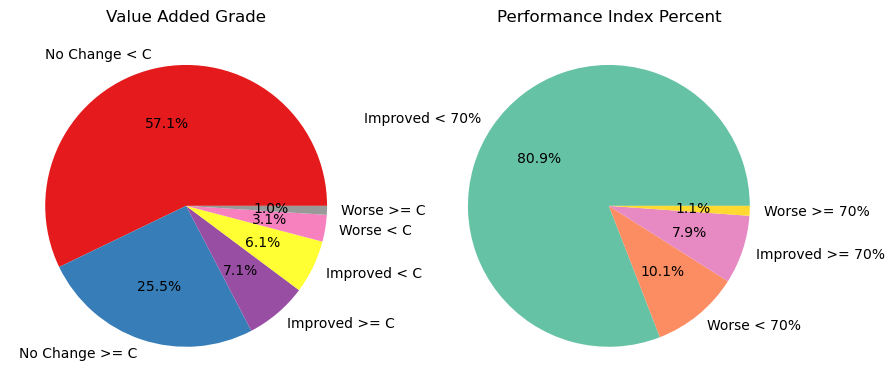

In [112]:
fig1 = plt.figure(figsize=(10,5))
# ax = fig1.add_subplot(111)
ax1 =fig1.add_subplot(121)
theme = plt.get_cmap('Set1')
ax1.set_prop_cycle("color", [theme(20. * i / len(df_wide.Improvement))
                             for i in range(len(df_wide.Improvement))])
cts = df_wide.Improvement.value_counts().to_frame()
ax1.pie(cts.Improvement, labels = df_wide['Improvement'].unique(), autopct = '%1.1f%%')
ax1.set_title('Value Added Grade')
# ax1.set_label(df_wide1['improvement'])



ax2 = fig1.add_subplot(122)
theme = plt.get_cmap('Set2')
ax2.set_prop_cycle("color", [theme(20. * i / len(df_wide_per.Improvement))
                             for i in range(len(df_wide_per.Improvement))])
cts = df_wide_per.Improvement.value_counts().to_frame()
ax2.pie(cts.Improvement, labels = df_wide_per['Improvement'].unique(), autopct = '%1.1f%%')
ax2.set_title('Performance Index Percent')

# plt.set_title('Value Added Grade 2015-2018')
plt.show()

In [113]:
writer = pd.ExcelWriter("visuals_dataset.xlsx", engine="xlsxwriter")
df_wide.to_excel(writer, sheet_name="Value_add")
df_wide_per.to_excel(writer, sheet_name="Performance_index")
writer.close()

### Value added and Performance index seperated in above and below C grade 2018

In [ ]:
# conditions and values for performance over time 
conditions1 = [
    (df_wide[1] == df_wide[3]),
    (df_wide[1] <= df_wide[2]) & (df_wide[2] <= df_wide[3]),
    (df_wide[1] >= df_wide[2]) & (df_wide[2] >= df_wide[3]),
    (df_wide[1] > df_wide[3]),
    (df_wide[1] < df_wide[3])
    ]
values1 = ['No Change', 'Steadily Improve', 'Steadily Worse', 'Worse', 'Improve']
#coundition for contextualizing performance over time 
conditions2 = [
    (df_wide[3] >= 3),
    (df_wide[3] < 3)
    ]
values2 = ['C or Above', 'Below C']
#conditions for percentage 
conditions3 = [
    (df_wide_per[1] == df_wide_per[2]),
    (df_wide_per[1] <= df_wide_per[2]) & (df_wide_per[2] <= df_wide_per[3]),
    (df_wide_per[1] >= df_wide_per[2]) & (df_wide_per[2] >= df_wide_per[3]),
    (df_wide_per[1] > df_wide_per[3]),
    (df_wide_per[1] < df_wide_per[3])
    ]

conditions4 = [
    (df_wide_per[3] >= 70),
    (df_wide_per[3] < 70)
    ]

#### Return to pivot table creation 

In [ ]:
df_wide['improvement'] = np.select(conditions1, values1)
df_wide['2018 Grade'] = np.select(conditions2, values2)
# df_wide.sort_values(by=['Building IRN']).head(50)

In [ ]:
df_wide_per['improvement'] = np.select(conditions3, values1)
df_wide_per['2018 Grade'] = np.select(conditions4, values2)

In [ ]:
df_wide[df_wide['improvement']==0]

In [ ]:
df_wide_per[df_wide_per['Improvement'] == '0']

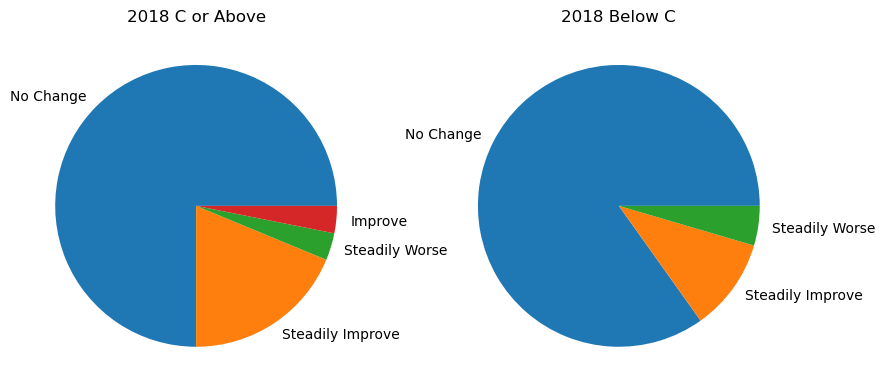

In [107]:
df_wide1 = df_wide[df_wide['2018 Grade'] == 'C or Above']
df_wide2 = df_wide[df_wide['2018 Grade'] == 'Below C']

fig1 = plt.figure(figsize=(10,5))
# ax = fig1.add_subplot(111)
ax1 =fig1.add_subplot(121)
cts = df_wide1.improvement.value_counts().to_frame()
ax1.pie(cts.improvement, labels = df_wide1['improvement'].unique())
ax1.set_title('2018 C or Above')
ax1.set_label(df_wide1['improvement'])

ax2 = fig1.add_subplot(122)
cts = df_wide2.improvement.value_counts().to_frame()
ax2.pie(cts.improvement, labels = df_wide2['improvement'].unique())
ax2.set_title('2018 Below C')

# plt.set_title('Value Added Grade 2015-2018')
plt.show()

In [77]:
print(str(len(df_wide1)) + ' c or Above')
print(str(len(df_wide2)) + ' Below C')

33 c or Above
70 Below C


### Performance Index

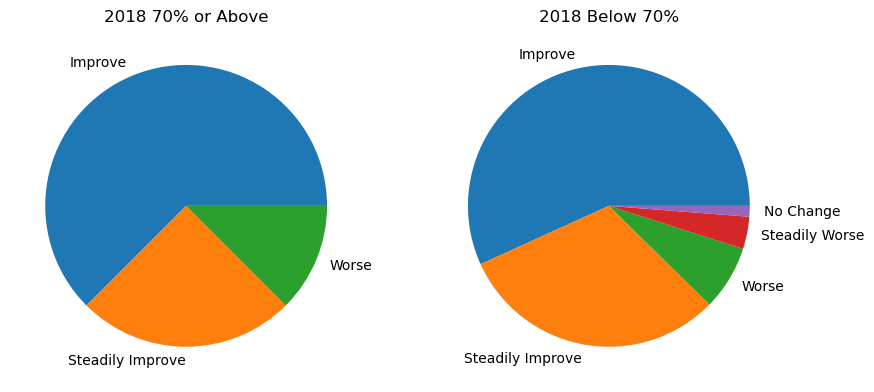

In [108]:
#performance
df_wide_per1 = df_wide_per[df_wide_per['2018 Grade'] == 'C or Above']
df_wide_per2 = df_wide_per[df_wide_per['2018 Grade'] == 'Below C']

fig2 = plt.figure(figsize=(10,5))
# ax = fig1.add_subplot(111)
ax1 =fig2.add_subplot(121)
cts = df_wide_per1.improvement.value_counts().to_frame()
ax1.pie(cts.improvement, labels = df_wide_per1['improvement'].unique())
ax1.set_title('2018 70% or Above')
ax1.set_label(df_wide_per1['improvement'])

ax2 = fig2.add_subplot(122)
cts = df_wide_per2.improvement.value_counts().to_frame()
ax2.pie(cts.improvement, labels = df_wide_per2['improvement'].unique())
ax2.set_title('2018 Below 70%')

# plt.set_title('Value Added Grade 2015-2018')
plt.show()


In [80]:
print(str(len(df_wide_per1)) + ' 70% or Above')
print(str(len(df_wide_per2)) + ' Below 70%')

8 70% or Above
83 Below 70%


### export dfs for map

In [112]:
VA_map_df = df_wide2
Perf_map_df = df_wide_per2

In [119]:
writer = pd.ExcelWriter("visuals_dataset.xlsx", engine="xlsxwriter")
df_wide1.to_excel(writer, sheet_name="VA_C_above")
VA_map_df.to_excel(writer, sheet_name="VA_under_C")
df_wide_per1.to_excel(writer, sheet_name="Perf_C_above")
Perf_map_df.to_excel(writer, sheet_name="Perf_under_c")
writer.close()